In [11]:
import sim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pretty_plots

In [3]:
ray = sim.utils.ray(np.array([1,0,0]),4,25)
analytic = sim.halos.Analytic.Uniform(ray,r=2)

In [4]:
noises = []
noises_f2 = []
noises_f4 = []
ns = 2**np.arange(5,23)
xs = []
for n in tqdm(ns):
    for i in range(10):
        df = sim.halos.Sample.Uniform(n,r=2)
        outf8,timef8 = sim.static_solver.evaluate(ray,df,precision="f8")
        noises.append((outf8 - analytic))

        outf4,timef4 = sim.static_solver.evaluate(ray,df,precision="f4-smcuda")
        noises_f4.append((outf4 - analytic))

        outf2,timef2 = sim.static_solver.evaluate(ray,df,precision="f2-smcuda")
        noises_f2.append((outf2 - analytic))

        xs.append(n)

100%|██████████| 18/18 [09:22<00:00, 31.26s/it] 


(180, 25)


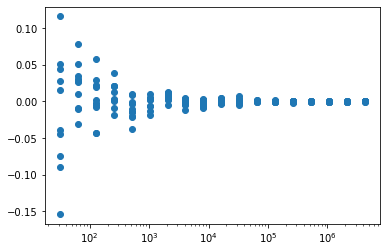

In [5]:
noises_f8 = np.array(noises)
noises_f4 = np.array(noises_f4)
noises_f2 = np.array(noises_f2)
print(noises_f8.shape)
plt.scatter(xs,np.mean((noises_f8/analytic),axis=1))
plt.xscale('log')
plt.show()

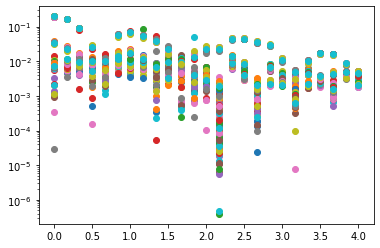

In [6]:
rels = np.abs((noises_f8-noises_f2))
for noise,n in zip(rels,xs):
    plt.scatter(sim.utils.points2radius(ray),noise,label=str(n))
plt.yscale('log')
plt.show()

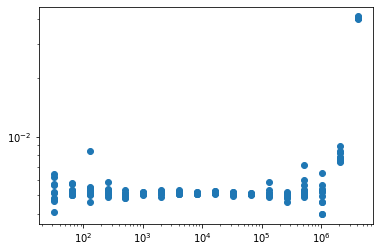

In [7]:
means = []
for noise in rels:
    means.append(np.mean(np.abs(noise)))
plt.xscale('log')
plt.yscale('log')
plt.scatter(xs,means)
plt.show()

In [12]:
pretty_plots.plot_pretty()

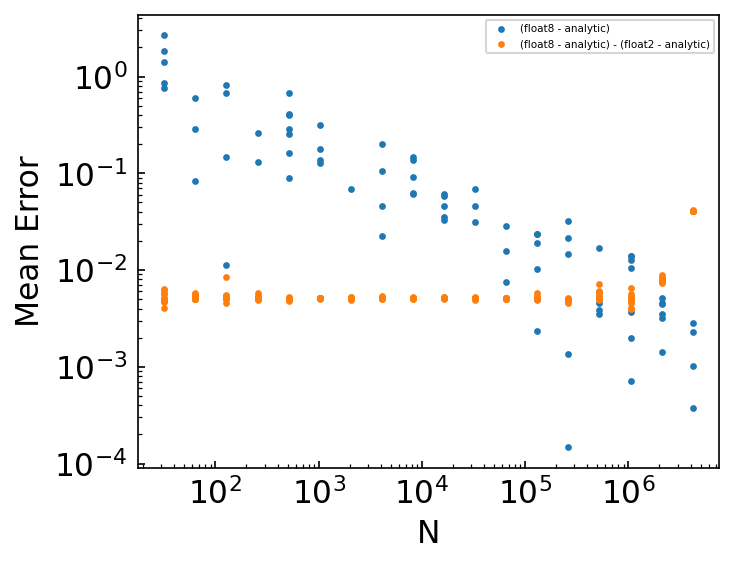

In [18]:
noise_mean = []
for noise in noises_f8:
    noise_mean.append(np.mean(noise))
plt.xscale('log')
plt.yscale('log')
plt.scatter(xs,noise_mean,s=5, label="(float8 - analytic)")
plt.scatter(xs,means,s=5, label="(float8 - analytic) - (float2 - analytic)")
plt.ylabel("Mean Error")
plt.xlabel("N")
plt.legend()
plt.show()